# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("previsao_de_renda.csv")

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### Avaliando se a variavel "educacao" discrimina a "renda":

                           renda
educacao                        
Primário             3458.406684
Pós graduação        6192.353158
Secundário           4434.159239
Superior completo    5037.859590
Superior incompleto  4159.282638


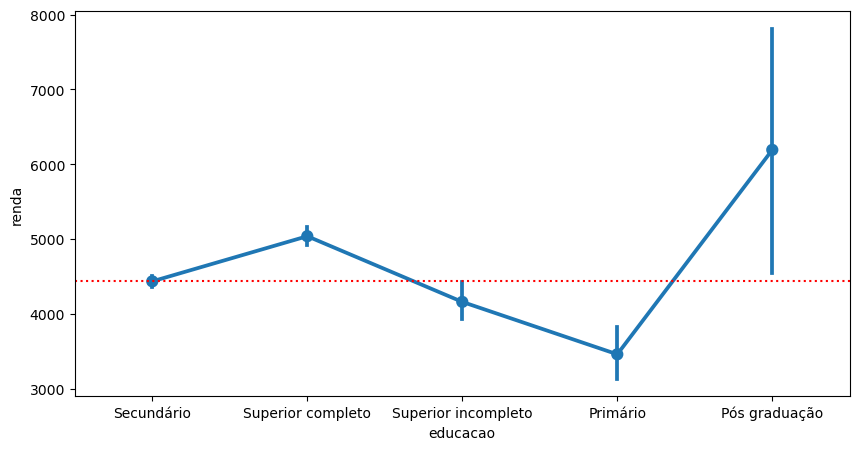

In [4]:

# pivot_table para avaliar matematicamente:

pivot_educacao_x_renda = df.pivot_table( index = 'educacao', values = ['renda'] )

print(pivot_educacao_x_renda)



# gráfico para avaliar estatisticamente:

plt.figure( figsize=[10,5] )


ax = sns.pointplot(data = df, x = 'educacao', y = 'renda', errorbar=('ci', 90))


# traça uma linha na média da escolaridade "Secundário"
ax.axhline( y = df.loc[ df['educacao'] == 'Secundário', 'renda' ].mean(),
            color = 'red',
            linestyle = ':')


plt.show()

* Matematicamente falando, pode-se conferir através dos valores do pivot_table que os individuos com superior completo e pós graduação são os que mais recebem.

* Estatisticamente falando, com um intervalo de confiança de 90%, é possível conferir através do gráfico, que realmente os individuos com Ensino Superior completo e pós graduação tem uma renda maior que os demais com outros graus de escolaridade.

### Avaliando se a variavel "tipo_renda" discrimina a "renda":

                        renda
tipo_renda                   
Assalariado       4555.150763
Bolsista          4580.062500
Empresário        5219.621323
Pensionista       3525.346445
Servidor público  5665.229377


<Axes: xlabel='tipo_renda', ylabel='renda'>

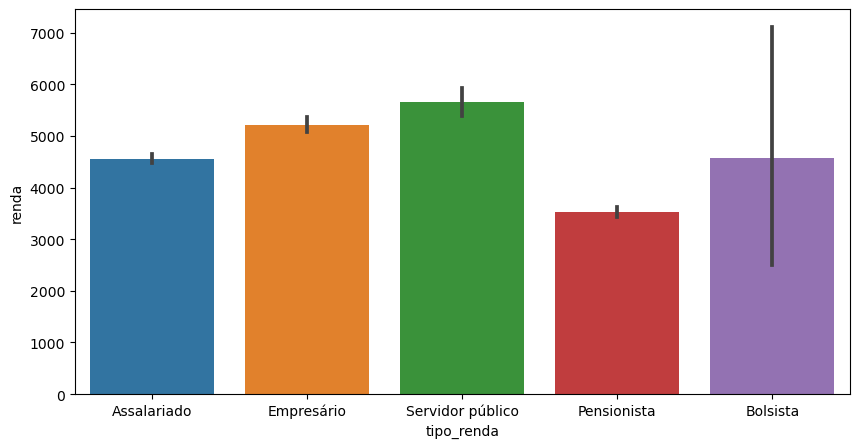

In [5]:

# pivot_table para avaliar matematicamente:

pivot_tipoRenda_x_renda = df.pivot_table( index = 'tipo_renda',
                                          values = ['renda'])

print(pivot_tipoRenda_x_renda)



# gráfico para avaliar estatisticamente:

plt.figure( figsize=[10,5] )

sns.barplot( data = df,
             x = 'tipo_renda',
             y = 'renda',
             errorbar = ('ci', 90)) # intervalo de confiança de 99%

* Apesar de matematicamente a renda de Empresários e Servidores Públicos ser maior (conforme pivot_table), estatisticamente não é. Com um intervalo de confiança de 90%, pode-se conferir através do gráfico, que todos os casos estão dentro do intervalo de confiança do caso "bolsista". 